# Diagnostics

Machine learning offers a wide range of tools—from linear and logistic regression to deep learning and decision trees. However, building a high-performing ML system isn’t just about choosing the right algorithm; it’s about making smart, iterative decisions throughout the project. Effective diagnostics and model evaluation can dramatically reduce development time.

## Iterative Decision-Making & Diagnostics

When a model (say, regularized linear regression for predicting housing prices) yields unsatisfactory predictions, you have several levers to pull:
- **Data:** Is more training data needed?  
- **Features:** Would reducing or expanding your feature set (e.g., adding house characteristics or generating polynomial features) help?  
- **Regularization:** Should you adjust the regularization parameter $\lambda$ (increase or decrease it)?

Running systematic **diagnostics**—tests that reveal which adjustments might lead to improvement—helps avoid spending months on unproductive changes. For example, diagnostics can reveal whether collecting additional data will meaningfully reduce error or if overfitting is the primary issue.

## Evaluating Model Performance

### Train/Test Split

To assess how well your model generalizes to unseen data, start by splitting your dataset:

- **Training Set:** Typically 70–80% of your data, used to fit the model.
- **Test Set:** The remaining 20–30%, reserved exclusively for evaluation.

#### Regression Example

For regularized linear regression, the training cost function is:

$$
J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} \left(\hat{y}^{(i)} - y^{(i)}\right)^2 + \frac{\lambda}{2m} \sum_{j=1}^{n} w_j^2.
$$

When evaluating on the test set, **exclude the regularization term**:

$$
J_{test}(w,b) = \frac{1}{2m_{test}} \sum_{i=1}^{m_{test}} \left(\hat{y}^{(i)} - y^{(i)}\right)^2.
$$

#### Classification Example

For binary classification (e.g., distinguishing between 0 and 1 in digit recognition):
- You might use logistic regression with its logistic loss function.
- Alternatively, compute the **misclassification error**—the fraction of examples where the predicted label doesn’t match the true label.

### Practical Example

Imagine fitting a fourth-order polynomial to predict housing prices based on size. The model might fit the training data nearly perfectly (low $J_{train}$) but perform poorly on new data (high $J_{test}$) if it overfits. Visualizing such a model is straightforward with one feature, but as dimensions increase, systematic metrics become essential.

## Model Selection with Three-Way Data Splits

Relying solely on a training/test split can be misleading—especially when you need to choose among several models (e.g., polynomials of different degrees or different neural network architectures). Instead, use a three-way split:

- **Training Set:** Fit the model parameters.
- **Cross-Validation (CV) Set:** Also called the validation or dev set, use this to compare models.
- **Test Set:** Evaluate the final chosen model for an unbiased generalization error.

### Step-by-Step Procedure

1. **Split the Data:**  
   For instance, with 10 examples, you might allocate 60% to training, 20% to cross-validation, and 20% to testing.

2. **Train Multiple Models:**  
   Fit models of varying complexity (e.g., polynomial degrees 1 to 10).  
   Denote the parameters for a degree-$d$ model as $(w^d, b^d)$.

3. **Evaluate Using the CV Set:**  
   Compute the CV error for each model:
$$
J_{cv}(w,b) = \frac{1}{2m_{cv}} \sum_{i=1}^{m_{cv}} \left(\hat{y}^{(i)} - y^{(i)}\right)^2.
$$

    Choose the model with the lowest CV error.

5. **Final Evaluation on the Test Set:**  
   Once a model is chosen (say, the degree-4 polynomial with parameters $(w^4, b^4)$), report its performance using:

$$
J_{test}(w^4,b^4) = \frac{1}{2m_{test}} \sum_{i=1}^{m_{test}} \left(\hat{y}^{(i)} - y^{(i)}\right)^2.
$$

   This gives a fair estimate of how the model will perform on new data.

### Extending to Other Models

For neural networks in digit recognition:
- Train different architectures (varying number of layers or hidden units).
- Use the CV set (commonly evaluating misclassification error) to select the best architecture.
- Finally, use the test set to gauge the chosen model’s generalization.

## Best Practices & Looking Ahead

- **Avoid Data Leakage:** Never use the test set during model selection or parameter tuning; reserve it only for the final evaluation.
- **Run Diagnostics Regularly:** Monitoring metrics like bias (error from simplifying assumptions) and variance (sensitivity to training data) helps you balance model complexity.
- **Iterate Efficiently:** Use systematic testing to direct your improvements, rather than random trial and error.

Understanding bias and variance will be key in your next steps. Bias indicates when a model is too simple (underfitting), while variance reflects when a model is too complex (overfitting). Balancing these aspects is critical to developing robust machine learning systems.


In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset and inspect the shapes
data = np.loadtxt("data/diagnostics_ex1.csv", delimiter=",")
x, y = data[:,0], data[:,1]

# x = np.expand_dims(x, axis=1)
x = x[:,None]
y = y.reshape(-1, 1)
x.shape, y.shape

((50, 1), (50, 1))

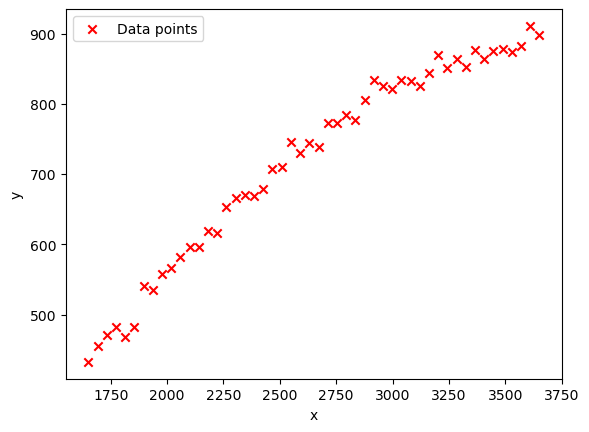

In [4]:
# Vis the data by plotting it
plt.scatter(x, y, marker="x", color="red", label="Data points")
plt.ylabel("y")
plt.xlabel("x")
plt.legend();

In [5]:
# Create 3 sets from the data (training, test, cross validation)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=1)
x_test, x_cv, y_test, y_cv = train_test_split(x_test, y_test)

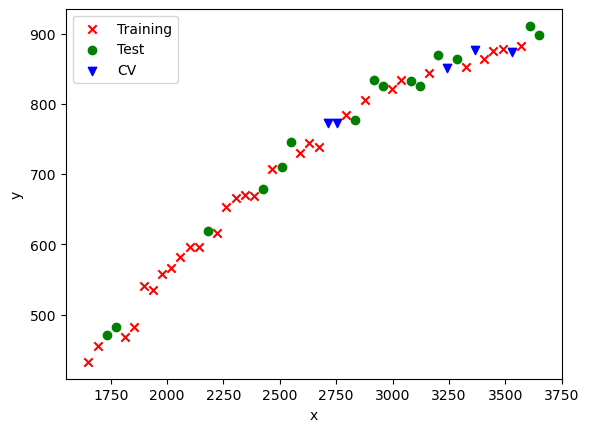

In [6]:
# Plot each
plt.scatter(x_train, y_train, marker="x", color="red", label="Training")
plt.scatter(x_test, y_test, marker="o", color="green", label="Test")
plt.scatter(x_cv, y_cv, marker="v", color="blue", label="CV")
plt.ylabel("y")
plt.xlabel("x")
plt.legend();

In [7]:

# Perform feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

# Check out some metrics about the data
scaler.mean_, scaler.scale_.squeeze()

(array([2504.06122449]), array(574.85368063))

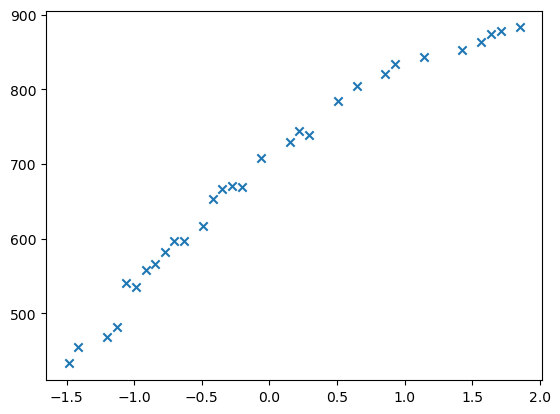

In [8]:
# Plot it again
plt.scatter(x_train_scaled, y_train, marker="x");

In [9]:

# Train a model 
model = LinearRegression()
model.fit(x_train_scaled, y_train)

LinearRegression()

In [10]:
# Evaluate model
yhat = model.predict(x_train_scaled)
print(f"Training MSE: {mean_squared_error(y_train, yhat) / 2}")

Training MSE: 406.19374192533127


In [11]:
# Get the MSE of cross validation
x_cv_scaled = scaler.transform(x_cv)
yhat = model.predict(x_cv_scaled)

print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")

Cross validation MSE: 541.3131497418811


In [12]:
from sklearn.preprocessing import PolynomialFeatures
# Let's add polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)

# Compute the number of features and transform the training set
x_train_mapped = poly.fit_transform(x_train)

print(x_train_mapped[:5])

[[3.32446939e+03 1.10520967e+07]
 [2.34487755e+03 5.49845073e+06]
 [3.48773469e+03 1.21642933e+07]
 [2.63059184e+03 6.92001341e+06]
 [2.58977551e+03 6.70693719e+06]]


In [13]:
# Scale the training data
scaler = StandardScaler()
x_train_mapped_scaled = scaler.fit_transform(x_train_mapped)
x_train_mapped_scaled[:5]

array([[ 1.42715997,  1.47236856],
       [-0.27691164, -0.36461881],
       [ 1.71117191,  1.84025141],
       [ 0.22010925,  0.1055935 ],
       [ 0.14910627,  0.03511397]])

In [14]:
# Train the model
model = LinearRegression()
model.fit(x_train_mapped_scaled, y_train)

LinearRegression()

In [15]:
# Evaluate the model
yhat = model.predict(x_train_mapped_scaled)
print("Training MSE={}".format(mean_squared_error(y_train, yhat)))

x_cv_mapped = poly.transform(x_cv)
x_cv_mapped_scaled = scaler.transform(x_cv_mapped)
yhat = model.predict(x_cv_mapped_scaled)
print("Cross Validation MSE={}".format(mean_squared_error(y_cv, yhat)))

Training MSE=98.22321866805024
Cross Validation MSE=57.7326504852575


In [16]:
# Now let's try training many models with different polynomial degrees and see which one is doing better

 # Loop over 10 times. Each adding one more degree of polynomial higher than the last.
results = []
for degree in range(1,11):
    item = {}
    
    # Add poly features:
    poly = PolynomialFeatures(degree, include_bias=False)
    x_train_mapped = poly.fit_transform(x_train)
    item["poly"] = poly

    # Scale the input
    scaler = StandardScaler()
    x_train_mapped_scaled = scaler.fit_transform(x_train_mapped)
    item["scaler"] = scaler

    # Create and train model
    model = LinearRegression()
    model.fit(x_train_mapped_scaled, y_train)
    item["model"] = model

    # Compute training MSE
    yhat = model.predict(x_train_mapped_scaled)
    item["train_mse"] = mean_squared_error(y_train, yhat) / 2

    # Compute the cross validation MSE
    x_cv_mapped = poly.transform(x_cv)
    x_cv_mapped_scaled = scaler.transform(x_cv_mapped)
    yhat = model.predict(x_cv_mapped_scaled)
    item["cv_mse"] = mean_squared_error(y_cv, yhat) / 2
    results.append(item)



In [17]:
cv_mses = [i["cv_mse"] for i in results]
train_mses = list(map(lambda i: i["train_mse"], results))

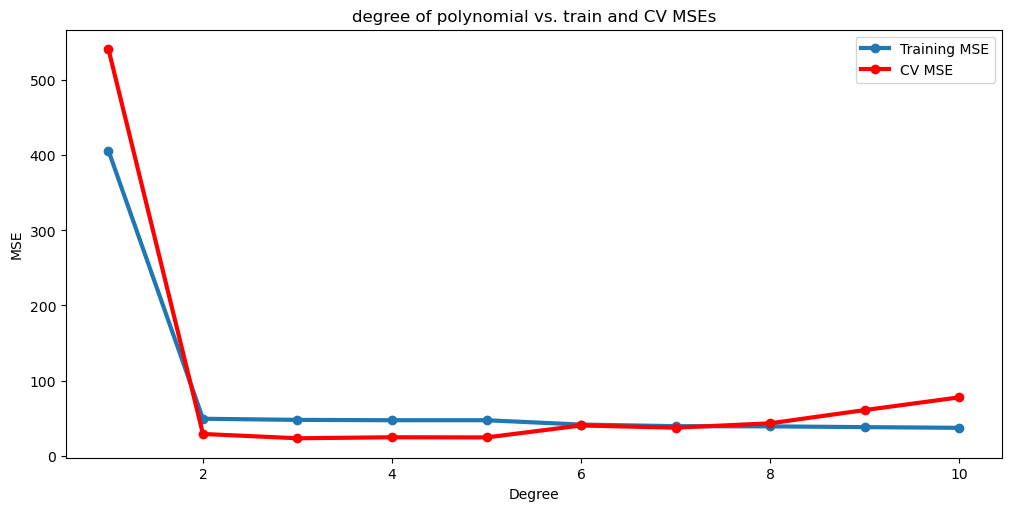

In [18]:
# Let's use a plot to determine which model performed better
fig, ax = plt.subplots(layout="constrained", figsize=(10,5))
ax.plot(np.arange(1, 11), train_mses, label="Training MSE", linewidth=3, marker="o")
ax.plot(np.arange(1, 11), cv_mses, label="CV MSE", linewidth=3, c="red", marker="o")
ax.set(title="degree of polynomial vs. train and CV MSEs", xlabel="Degree", ylabel="MSE")
ax.legend();

In [19]:
# Find the best model 
degree = np.argmin(cv_mses) + 1
print(f"Lowest CV MSE is found in the model with degree={degree}")

Lowest CV MSE is found in the model with degree=3


In [20]:
x_test_mapped = results[degree-1]["poly"].transform(x_test)
x_test_mapped_scaled = results[degree-1]["scaler"].transform(x_test_mapped)
yhat = results[degree-1]["model"].predict(x_test_mapped_scaled)

print("Test MSE={}".format(mean_squared_error(y_test, yhat)/2))

Test MSE=124.20735319929744


In [21]:
# Let's try this same process using neural networks:
tf.random.set_seed(20)

In [23]:
models = [
    tf.keras.models.Sequential(
        [
            tf.keras.layers.Dense(25, activation = 'relu'),
            tf.keras.layers.Dense(15, activation = 'relu'),
            tf.keras.layers.Dense(1, activation = 'linear')
        ],
        name='model_1'
    ),
     tf.keras.models.Sequential(
        [
            tf.keras.layers.Dense(20, activation = 'relu'),
            tf.keras.layers.Dense(12, activation = 'relu'),
            tf.keras.layers.Dense(12, activation = 'relu'),
            tf.keras.layers.Dense(10, activation = 'relu'),
            tf.keras.layers.Dense(1, activation = 'linear')
        ],
        name='model_2'
    ),
     tf.keras.models.Sequential(
        [
            tf.keras.layers.Dense(32, activation = 'relu'),
            tf.keras.layers.Dense(16, activation = 'relu'),
            tf.keras.layers.Dense(8, activation = 'relu'),
            tf.keras.layers.Dense(4, activation = 'relu'),
            tf.keras.layers.Dense(12, activation = 'relu'),
            tf.keras.layers.Dense(1, activation = 'linear')
        ],
        name='model_3'
    )
]

In [24]:
degree = 1
poly = PolynomialFeatures(degree, include_bias=False)
scaler = StandardScaler()

X_train_mapped = poly.fit_transform(x_train)
X_cv_mapped = poly.transform(x_cv)
X_test_mapped = poly.transform(x_test)

X_train_mapped_scaled = scaler.fit_transform(X_train_mapped)
X_cv_mapped_scaled = scaler.transform(X_cv_mapped)
X_test_mapped_scaled = scaler.transform(X_test_mapped)

train_mses, cv_mses = [],[]
for model in models:
    model.compile(
        loss="mse",
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    )

    model.fit(X_train_mapped_scaled, y_train, epochs=300, verbose=0)
    yhat = model.predict(X_train_mapped_scaled)
    train_mse = mean_squared_error(y_train, yhat) / 2
    train_mses.append(train_mse)
    
    # Record the cross validation MSEs 
    yhat = model.predict(X_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    cv_mses.append(cv_mse)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [25]:
for i, model in enumerate(models):
    print(f"Model {model.name}: Training MSE: {train_mses[i]:.2f}, CV MSE: {cv_mses[i]:.2f}")

Model model_1: Training MSE: 406.19, CV MSE: 541.31
Model model_2: Training MSE: 73.40, CV MSE: 53.76
Model model_3: Training MSE: 9702.85, CV MSE: 12071.54


In [26]:
# Select the best model
model = models[0]
yhat = model.predict(scaler.transform(poly.transform(x_test)))

print("Test MSE={mse}".format(mse=mean_squared_error(y_test, yhat)/2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Test MSE=499.5171356950329


In [27]:
# Let's try a classification problem
data = np.loadtxt("data/diagnostics_ex2.csv", delimiter=",")
X = data[:,:-1]
y = data[:,-1].reshape(-1, 1)
X.shape, y.shape

((200, 2), (200, 1))

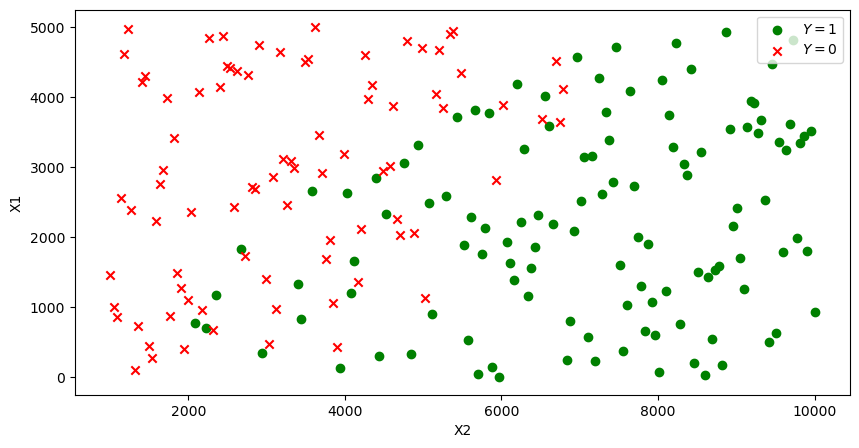

In [28]:
# Let's plot the data
X_positive = X[y[:,0] == 1]
X_negative = X[y.squeeze() == 0] # or ravel

plt.figure(figsize=(10, 5))
plt.scatter(X_positive[:,0], X_positive[:,1], marker="o", c="green", label="$Y=1$")
plt.scatter(X_negative[:,0], X_negative[:,1], marker="x", c="red", label="$Y=0$")
plt.ylabel("X1")
plt.xlabel("X2")
plt.legend();

In [29]:
# Let's create our model:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=1)

In [30]:
# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_cv_scaled = scaler.transform(X_cv)

In [31]:
models = [
    tf.keras.models.Sequential(
        [
            tf.keras.layers.Dense(25, activation="relu"),
            tf.keras.layers.Dense(15, activation="relu"),
            tf.keras.layers.Dense(1)
        ], 
        name="model_1"
    ),
    tf.keras.models.Sequential(
        [
            tf.keras.layers.Dense(20, activation = 'relu'),
            tf.keras.layers.Dense(12, activation = 'relu'),
            tf.keras.layers.Dense(12, activation = 'relu'),
            tf.keras.layers.Dense(10, activation = 'relu'),
            tf.keras.layers.Dense(1, activation = 'linear')
        ],
        name='model_2'
    ),
    tf.keras.models.Sequential(
        [
            tf.keras.layers.Dense(32, activation = 'relu'),
            tf.keras.layers.Dense(16, activation = 'relu'),
            tf.keras.layers.Dense(8, activation = 'relu'),
            tf.keras.layers.Dense(4, activation = 'relu'),
            tf.keras.layers.Dense(12, activation = 'relu'),
            tf.keras.layers.Dense(1, activation = 'linear')
        ],
        name='model_3'
    )
]

In [32]:
train_errors, cv_errors = [],[]
for model in models:
    # Compile
    model.compile(optimizer="adam", loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=["accuracy"])
    history = model.fit(X_train_scaled, y_train, epochs=200, verbose=0)


    train_error = 1 - history.history["accuracy"][-1]
    train_errors.append(train_error)

    cv_loss, cv_accuracy = model.evaluate(X_cv_scaled, y_cv, verbose=0)
    cv_errors.append(1-cv_accuracy)

In [33]:
model = np.argmin(cv_errors)
model

np.int64(0)

In [34]:
yhat = models[model].predict(X_test_scaled)
yhat = tf.math.sigmoid(yhat)
yhat = np.where(yhat >= 0.5, 1, 0)
error = np.mean(yhat != y_test)
error

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


np.float64(0.15)

# Bias and Variance

When building machine learning systems, you start with an idea and train a model—but it rarely works perfectly at first. The key is knowing **what to try next**. A powerful diagnostic tool is to examine the **bias and variance** of your algorithm by looking at its performance on the training set versus a cross-validation set. This helps you decide whether to simplify or complexify your model, adjust regularization, or collect more data.

---

The central idea is to compare the training error ($J_{\text{train}}$) and cross-validation error ($J_{\text{cv}}$):

- **High Bias (Underfitting):**  
  - **Indicator:** $J_{\text{train}}$ is high.
  - **Interpretation:** Even on data it has seen, the model performs poorly.  
  - **Example:** Fitting a straight line (degree $d=1$) to data that clearly needs a curve.

- **High Variance (Overfitting):**  
  - **Indicator:** $J_{\text{train}}$ is low, but $J_{\text{cv}}$ is much higher (i.e., $J_{\text{cv}} \gg J_{\text{train}}$).
  - **Interpretation:** The model memorizes the training data but fails to generalize.  
  - **Example:** Fitting a high-degree polynomial (e.g., $d=4$) to a small dataset.

- **Balanced Fit:**  
  - **Indicator:** Both $J_{\text{train}}$ and $J_{\text{cv}}$ are low.
  - **Example:** A quadratic (degree $d=2$) that neither underfits nor overfits.

*Clarification:*  
Even if you cannot visualize the function $f$ (especially in high-dimensional settings), comparing these errors gives insight into whether your model is suffering from bias or variance.

---

## The Role of Regularization

Regularization introduces a penalty on large weights to balance fitting the training data and keeping the model simple. The cost function becomes:
  
$$
J = \text{Loss} + \frac{\lambda}{2m} \sum_{i} w_i^2
$$

where $\lambda$ is the regularization parameter.

- **Large $\lambda$ (Strong Regularization):**  
  - Forces weights to be small, which can lead to a nearly constant function.
  - **Effect:** High bias (underfitting) because the model is too simple.

- **Small $\lambda$ (Weak Regularization):**  
  - Allows more flexibility (e.g., using a fourth-order polynomial without constraints).
  - **Effect:** Low training error but potentially high variance (overfitting).

*Practical Approach:*  
Try multiple $\lambda$ values (e.g., 0, 0.01, 0.02, …, 10) and choose the one that minimizes $J_{\text{cv}}$. This tuning via cross-validation helps balance the tradeoff.

*Visual Analogy:*  
When plotting error versus $\lambda$, the training error typically increases as $\lambda$ grows (due to the penalty), while the cross-validation error is U-shaped—high at very low and very high $\lambda$, with an optimal middle ground.

---

## Learning Curves

Learning curves plot the error (both $J_{\text{train}}$ and $J_{\text{cv}}$) as a function of the number of training examples ($m_{\text{train}}$):

- **High Bias Scenario:**  
  - The training error is high (even for small datasets) and plateaus quickly as more data is added.  
  - **Insight:** More data will not significantly lower the error because the model is too simple.

- **High Variance Scenario:**  
  - The training error is very low for small datasets, but $J_{\text{cv}}$ is much higher.
  - As more data is added, $J_{\text{train}}$ slowly increases while $J_{\text{cv}}$ decreases, potentially closing the gap.
  - **Insight:** Acquiring more data can improve generalization.

*Step-by-Step Breakdown:*  
1. Train the model on a small subset, record errors.
2. Increase the subset size incrementally.
3. Plot $J_{\text{train}}$ (rising curve) and $J_{\text{cv}}$ (falling curve).
4. Analyze the gap and plateau behavior to diagnose bias or variance.

---

## Strategies for Addressing Bias vs. Variance

Depending on your diagnosis, consider these adjustments:

- **Fixing High Variance:**
  - **Get more training examples.** More data helps the model generalize.
  - **Simplify the model:** Reduce the number of features or increase $\lambda$.
  
- **Fixing High Bias:**
  - **Enhance model complexity:** Add more features (or polynomial features) to capture nuances.
  - **Reduce regularization:** Lower $\lambda$ so the model can fit the training data better.

*Note:* Avoid reducing the training set size to fix high bias—it may lower training error artificially but hurt generalization.

---

## Baseline Performance and Error Gaps

In some applications (e.g., speech recognition), even humans achieve nonzero error due to noise. Here, establishing a **baseline performance** (like human-level accuracy) helps interpret error values:

- **High Bias:**  
  If $J_{\text{train}}$ is significantly above the baseline, the model is too simple.
  
- **High Variance:**  
  A large gap between $J_{\text{train}}$ and $J_{\text{cv}}$ indicates overfitting, even if $J_{\text{train}}$ is near the baseline.

*Example:*  
For a speech recognition system:
- Human error might be around 10.6%.
- If $J_{\text{train}} \approx 10.8\%$ (close to baseline) but $J_{\text{cv}} \approx 14.8\%$, the model suffers from high variance.

---

## Neural Networks: A Modern Perspective

Neural networks often change the bias–variance dynamics:

- **Large Neural Networks:**  
  With enough capacity, they tend to be **low bias** (able to fit training data very well).  
  However, they may suffer from high variance if not regularized properly.

- **Regularization in Neural Networks:**  
  The regularization term is similar:

  $$
  \text{Regularization Term} = \frac{\lambda}{2m} \sum_{i} w_i^2
  $$

  In frameworks like TensorFlow, you can add this term (e.g., using `kernel_regularizer=tf.keras.regularizers.l2(0.01)`).

- **Practical Recipe for Neural Networks:**
  1. **Check Training Error:** If $J_{\text{train}}$ is high relative to the baseline, increase network capacity (more layers/neurons).
  2. **Evaluate $J_{\text{cv}}$:** If there's a large gap between $J_{\text{train}}$ and $J_{\text{cv}}$, then you likely need more data or stronger regularization.
  3. **Iterate:** Adjust the network size and regularization until both training and cross-validation errors are satisfactory.

*Key Insight:*  
It almost never hurts to use a larger neural network as long as you regularize properly—the risk of overfitting can be controlled even with very flexible models.

---

## Summary

- **Diagnosis:** Compare $J_{\text{train}}$ and $J_{\text{cv}}$ to identify high bias (both errors high) versus high variance (training error low but cross-validation error high).
- **Regularization:** Adjust $\lambda$ to control model flexibility. High $\lambda$ increases bias; low $\lambda$ can lead to variance.
- **Learning Curves:** Use them to assess whether more data might help or if the model is inherently too simple.
- **Actionable Strategies:**
  - For **high variance:** Get more data, simplify the model, or increase $\lambda$.
  - For **high bias:** Increase model complexity (more features, higher-order polynomials, or larger neural networks) and reduce $\lambda$.
- **Neural Networks:** Their large capacity often leads to low bias; focus on regularization and data size to manage variance.

By continuously evaluating these metrics and adjusting your approach, you can iteratively improve your machine learning system's performance.

---


In [73]:
data = np.loadtxt("data/diagnostics_ex3.csv", delimiter=",")
X, y = data[:,:-1], data[:,-1][:,np.newaxis]
X.shape, y.shape

((100, 1), (100, 1))

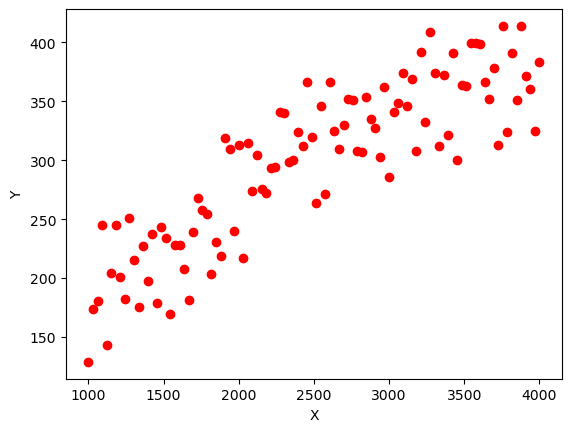

In [74]:
plt.scatter(X, y, color="red")
plt.xlabel("X")
plt.ylabel("Y");

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=80)
X_cv, X_test, y_cv, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=80)

In [76]:
# Let's first try different degrees of poly to see which one does best
model = LinearRegression()

results = []
for degree in range(1, 11):
    poly = PolynomialFeatures(degree, include_bias=False)
    X_train_mapped = poly.fit_transform(X_train)
    X_cv_mapped = poly.transform(X_cv)

    scaler = StandardScaler()
    X_train_mapped_scaled = scaler.fit_transform(X_train_mapped)
    X_cv_mapped_scaled = scaler.transform(X_cv_mapped)

    model.fit(X_train_mapped_scaled, y_train)

    yhat = model.predict(X_train_mapped_scaled)
    train_mse = mean_squared_error(y_train, yhat) / 2

    yhat = model.predict(X_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    results.append({
        "poly": poly,
        "scaler": scaler,
        "train_mse": train_mse,
        "cv_mse": cv_mse
    })

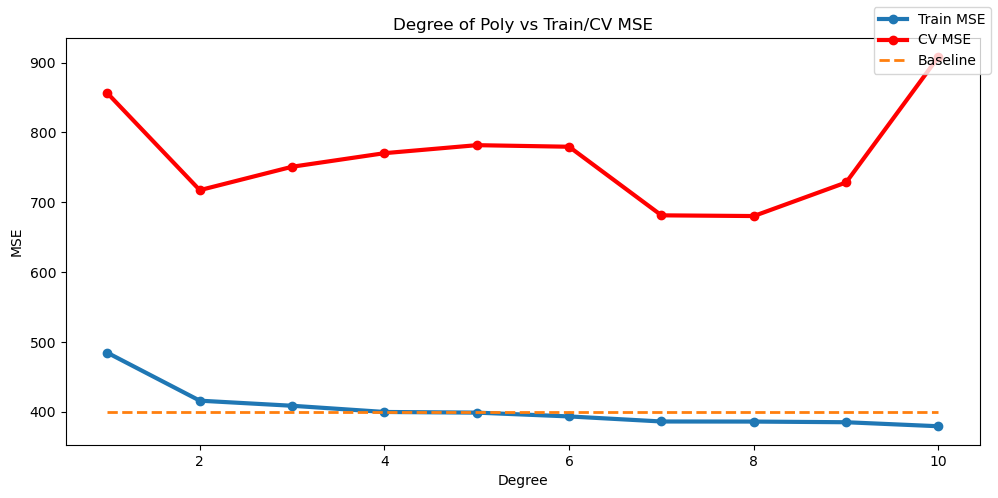

In [77]:
# Let's create a plot to see which one is doing the best:
fig, ax = plt.subplots(figsize=(10,5), layout="tight")

ax.set(ylabel="MSE", xlabel="Degree", title="Degree of Poly vs Train/CV MSE")
ax.plot(np.arange(1, 11), [m["train_mse"] for m in results], label="Train MSE", linewidth=3, marker="o")
ax.plot(np.arange(1, 11), [m["cv_mse"] for m in results], label="CV MSE", linewidth=3, marker="o", c="r")
ax.plot(np.arange(1, 11), np.repeat(400, 10), label="Baseline", linewidth=2, linestyle="--")
fig.legend();

# Evaluating Models on Imbalanced Data

In many real-world applications—such as detecting a rare disease—simply measuring accuracy can be misleading. Even if a model achieves 99% accuracy, that might hide its inability to correctly identify the rare events that matter most.

Imagine a binary classifier where:
- $y = 1$ means a patient has a rare disease.
- $y = 0$ means the patient is healthy.

If only 0.5% of patients have the disease, a trivial model that always predicts $y = 0$ would have an accuracy of 99.5% but would fail to detect any true cases. This demonstrates that **accuracy alone isn’t enough** when the classes are heavily imbalanced.

---

## Using the Confusion Matrix

A **confusion matrix** breaks down the predictions into four categories:

|                  | **Actual Positive ($y=1$)** | **Actual Negative ($y=0$)** |
|------------------|-----------------------------|-----------------------------|
| **Predicted Positive ($y=1$)** | True Positive (TP)        | False Positive (FP)       |
| **Predicted Negative ($y=0$)** | False Negative (FN)       | True Negative (TN)        |

For example, in a test set of 100 patients, suppose:
- **TP** = 15 (correctly detected disease)
- **FP** = 5 (incorrectly diagnosed healthy patients)
- **FN** = 10 (missed disease cases)
- **TN** = 70 (correctly identified healthy)

This matrix serves as the foundation for more insightful metrics.

---

## Precision and Recall

### Precision
Precision answers: “Of all the patients we predicted as having the disease, how many truly have it?”

Mathematically,
$$
\text{Precision} = \frac{TP}{TP + FP}
$$

In our example:
$$
\text{Precision} = \frac{15}{15+5} = 0.75 \quad \text{(or 75\%)}
$$

A high precision means that when the model flags a patient as diseased, it’s likely correct.

### Recall
Recall (or sensitivity) answers: “Of all the patients that actually have the disease, how many did we correctly detect?”

Formulated as,
$$
\text{Recall} = \frac{TP}{TP + FN}
$$

For the example:
$$
\text{Recall} = \frac{15}{15+10} = 0.60 \quad \text{(or 60\%)}
$$

High recall ensures that most patients with the disease are identified, reducing the risk of missing a true case.

---

## Adjusting the Decision Threshold

Models like logistic regression output probabilities between 0 and 1. Typically, a threshold of 0.5 is used:
- Predict $y = 1$ if $f(x) \geq 0.5$
- Otherwise, predict $y = 0$

**Changing the threshold affects precision and recall:**

- **Raising the Threshold (e.g., to 0.7 or 0.9):**
  - **Pros:** Increases precision because only predictions with high confidence become positive.
  - **Cons:** Lowers recall since more true cases may be missed.
  
- **Lowering the Threshold (e.g., to 0.3):**
  - **Pros:** Increases recall by capturing more potential cases.
  - **Cons:** Decreases precision due to more false alarms.

The choice of threshold should be guided by the costs associated with false positives versus false negatives. For instance, if a false positive leads to invasive treatment, you might prefer a higher threshold.

---

## Balancing with the F1 Score

When a model exhibits a trade-off between precision and recall, it can be useful to combine them into a single metric known as the **F1 score**. The F1 score is the harmonic mean of precision and recall, which penalizes low values:

$$
F_1 = 2 \cdot \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

For a model with 75% precision and 60% recall, the $F_1$ score will be closer to 60%, reflecting that poor performance in one area can significantly lower overall usefulness.

---

## Key Takeaways

- **Accuracy can be deceptive** in imbalanced datasets.
- The **confusion matrix** provides detailed insight by categorizing predictions into TP, FP, FN, and TN.
- **Precision** measures the quality of positive predictions, while **recall** measures the ability to detect actual positives.
- **Threshold tuning** allows you to balance between precision and recall depending on the application's needs.
- The **F1 score** is an effective single metric that balances both precision and recall, emphasizing the lower of the two.

Understanding and applying these metrics ensures you build models that are not just statistically accurate but also practically useful, especially in critical applications like medical diagnosis.
